# Método de Müller

## Condiciones

Este método es usado para determinar las raíces de funciones de la clase de los polinomios, es decir, funciones de la forma:

$$f\left(x\right) = a_nx^n + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \cdots + a_{1}x + a_0$$


## Proceso iterativo

El proceso iterativo se realiza al selecccionar tres primeras aproximaciones de la raíz y posteriormente obtener los coeficientes $a$, $b$ y $c$, los cuales se encuentran dados por:

$$a = \frac{\left(f\left(p_{n-2}\right) - f\left(p_{n}\right) \right)\left(p_{n-1} - p_{n}\right) - \left(f\left(p_{n-1}\right) - f\left(p_{n}\right)\right)\left(p_{n-2} - p_{n}\right)}{\left(p_{n-2} - p_{n}\right)\left(p_{n-1} - p_{n}\right)\left(p_{n-2} - p_{n-1}\right)}$$

$$b = \frac{\left(f\left(p_{n-1}\right) - f\left(p_{n}\right) \right)\left(p_{n-2} - p_{n}\right)^2 - \left(f\left(p_{n-2}\right) - f\left(p_{n}\right)\right)\left(p_{n-1} - p_{n}\right)^2}{\left(p_{n-2} - p_{n}\right)\left(p_{n-1} - p_{n}\right)\left(p_{n-2} - p_{n-1}\right)}$$

$$c = f(p_n)$$

Una vez determinados los coeficientes procedemos a determinar la siguiente aproximación de la forma:

$$p_{n+1} = p_n - \frac{2c}{b + sgn\left(b\right)\sqrt{b^2 - 4ac}}$$


## Condición de paro

Al igual que en los métodos anteriores podemos imponer una condición de paro en función de las aproximaciones sucesivas en términos del error absoluto y del valor de la función, es decir:

$$\left | f\left(x_n\right)\right | + \left | x_n-x_{n-1} \right | \leq \varepsilon$$

Esto únicamente lo aplicamos para este método debido a su velocidad de convergencia.

In [1]:
# Importamos las funciones a emplear
from numpy import sqrt, linspace
import matplotlib.pyplot as plt

# Procedemos a definir e inicializar las condiciones de paro del método
tol = 1.*(10**(-10)) # Obtener un error relativo de 10^(-10)
maxItera = 100 # Realizar máximo 100 iteraciones

In [2]:
# Definimos la funcion objetivo
def fx(x):
    fx = 16*x**4 + 88*x**3 + 159*x**2 + 76*x - 240
    return fx

In [3]:
#Comando mágico para que sea posible interactuar con la gráfica
%matplotlib notebook

<IPython.core.display.Javascript object>


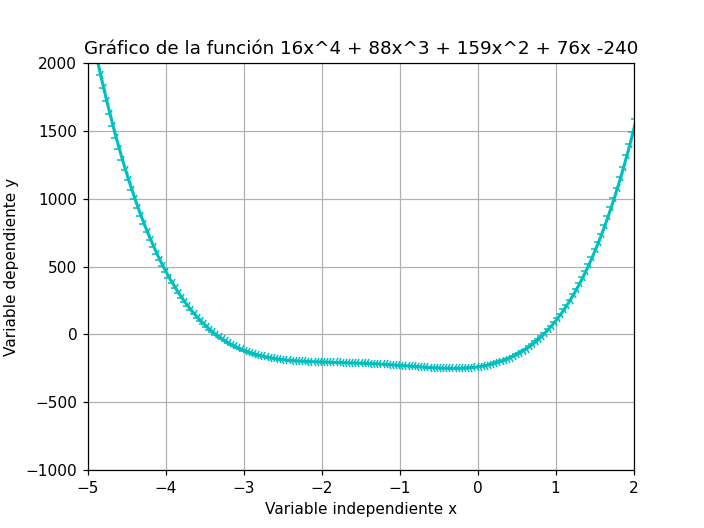

In [4]:
# Ahora para elegir los puntos a trabajar graficaremos primero la función a fin de identificar los puntos
x = linspace(-5, 3, 200)
y = fx(x)
e1 = plt.plot(x, y, 'c-3', linewidth = 2)
plt.xlabel("Variable independiente x", fontsize = 10)
plt.ylabel("Variable dependiente y", fontsize = 10)
plt.title("Gráfico de la función 16x^4 + 88x^3 + 159x^2 + 76x -240")
plt.ylim(-1000,2000)
plt.xlim(-5,2)
plt.grid(True)
plt.show()

In [5]:
# Definimos el punto inicial donde comenzaremos por aplicar el método así como el indice de conteo de las
# iteraciones y un error grande a fin de inicializar el método
p0 = -3 # aproximación inicial
p1 = -2 # primera aproximación
p2 = -2.5 # primera aproximación
k = 0 # Inicializamos las iteraciones
error = abs(fx(p2)) # Inicializamos el valor del error en un número muy grande

In [6]:
# Definimos la función signo
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [7]:
# Definimos una función que actualizará los coeficientes a,b y c del método de Müller
def actualizacoeficientes(p2, p1, p0, fx):
    
    # Definimos elementos necesarios para la actualización de los coeficientes
    f1 = fx(p1) - fx(p2)
    f2 = fx(p0) - fx(p2)
    x1 = p0 - p1
    x2 = p1 - p2
    x3 = p0 - p2
    
    # Calculamos el coeficiente a,b y c
    a = (f2 * x2 - f1 * x3) / (x3 * x2 * x1)
    b = (f1 * x3 * x3 - f2 * x2 * x2) / (x3 * x2 * x1)
    c = fx(p2)
    
    # Devolvemos los coeficientes
    return a, b, c

In [8]:
# Empezamos el método de Müller con los datos dados

# En este caso ya tenemos la raíz deseada
if fx(p2) == 0:
    # Se describe que existe una raíz en el punto dado previamente
    print('Se ha encontrado la raíz de la ecuación, la cual está dado por el punto {0}.'.format(p1))
    
# Dado que no tenemos la raíz aún procedemos a realizar iteraciones
else:
    # Señalamos que iniciamos el proceso iterativo
    print('Iniciamos el proceso iterativo')
    
    # Iniciamos el proceso iterativo
    while (error > tol and k < maxItera):
        
        # Iteramos el proceso
        a, b, c = actualizacoeficientes(p2, p1, p0, fx)
            
        # Incrementamos en 1 las iteraciones realizadas
        k = k + 1
        
        # Determinamos la nueva aproximacion
        p0 = p1
        p1 = p2
        p2 = p1 - (2*c)/(b+sgn(b)*sqrt(b**2 -4*a*c + 0j))
        
        error = abs(fx(p2)) # Error de aproximaciones
            
        # Imprimimos los resultados obtenidos de la iteracion
        print('Resultados de la iteracion {0}.'.format(k))
        print('La aproximación de la raíz se encuentra dada por {:.8}.'.format(p2))
        print('El valor de la función bajo la aproximación es {:.8}.'.format(fx(p2)))
        print('El error relativo se encuentra dado por {:.8}.\n'.format(error))

Iniciamos el proceso iterativo
Resultados de la iteracion 1.
La aproximación de la raíz se encuentra dada por (-3.4871433+0j).
El valor de la función bajo la aproximación es (62.78501+0j).
El error relativo se encuentra dado por 62.78501.

Resultados de la iteracion 2.
La aproximación de la raíz se encuentra dada por (-3.3181574+0j).
El valor de la función bajo la aproximación es (-16.92775+0j).
El error relativo se encuentra dado por 16.92775.

Resultados de la iteracion 3.
La aproximación de la raíz se encuentra dada por (-3.3569128+0j).
El valor de la función bajo la aproximación es (-0.49562007+0j).
El error relativo se encuentra dado por 0.49562007.

Resultados de la iteracion 4.
La aproximación de la raíz se encuentra dada por (-3.3580428+0j).
El valor de la función bajo la aproximación es (-0.00074665603+0j).
El error relativo se encuentra dado por 0.00074665603.

Resultados de la iteracion 5.
La aproximación de la raíz se encuentra dada por (-3.3580445+0j).
El valor de la funci

In [20]:
fx(-0.5)

-248.25